<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0609/01_3_TensorFlow_DNN%EA%B8%B0%EC%B4%88(%EA%B0%95%EC%82%AC%EB%8B%98%EC%BD%94%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## 문제0. 실험하기

각 레이어의 노드는 100개 일때(1번 케이스 제외), 아래 모델들을 실험해보세요 

- Layer 1개, activation sigmoid 함수 
- Layer 3개, activation sigmoid 함수
- Layer 5개, activation sigmoid 함수
- Layer 10개, activation relu 함수 

Loss는 어떻게 되나요? EPOCH, Learning rate 등 하이퍼파라미터는 어떻게 설정하셨나요?

In [ ]:
X, y = make_circles(factor=0.3, noise=0.1, n_samples=300)

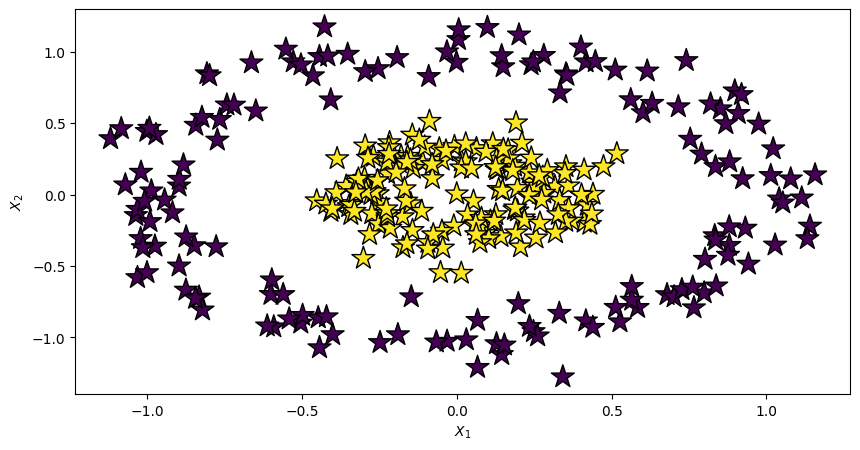

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,5))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 300, marker = '*',edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [ ]:
def plot_history(history):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 8))
    ax[0].plot(range(1, len(history.history['loss'])+1), history.history['loss'])
    ax[0].plot(range(1, len(history.history['loss'])+1), history.history['val_loss'])
    ax[1].plot(range(1, len(history.history['acc'])+1), history.history['val_acc'])
    ax[1].plot(range(1, len(history.history['acc'])+1), history.history['val_acc'])
    plt.show()

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.7353 - acc: 0.4861 - val_loss: 0.7644 - val_acc: 0.3750
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7345 - acc: 0.4861 - val_loss: 0.7634 - val_acc: 0.3750
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.7341 - acc: 0.4861 - val_loss: 0.7627 - val_acc: 0.3750
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7334 - acc: 0.4861 - val_loss: 0.7619 - val_acc: 0.3750
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7329 - acc: 0.4861 - val_loss: 0.7612 - val_acc: 0.3750
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.7324 - acc: 0.4861 - val_loss: 0.7606 - val_acc: 0.3750
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7318 - acc: 0.4861 - val_loss: 0.7599 - val_acc: 0.3750
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7313 - acc: 0.4861 - 

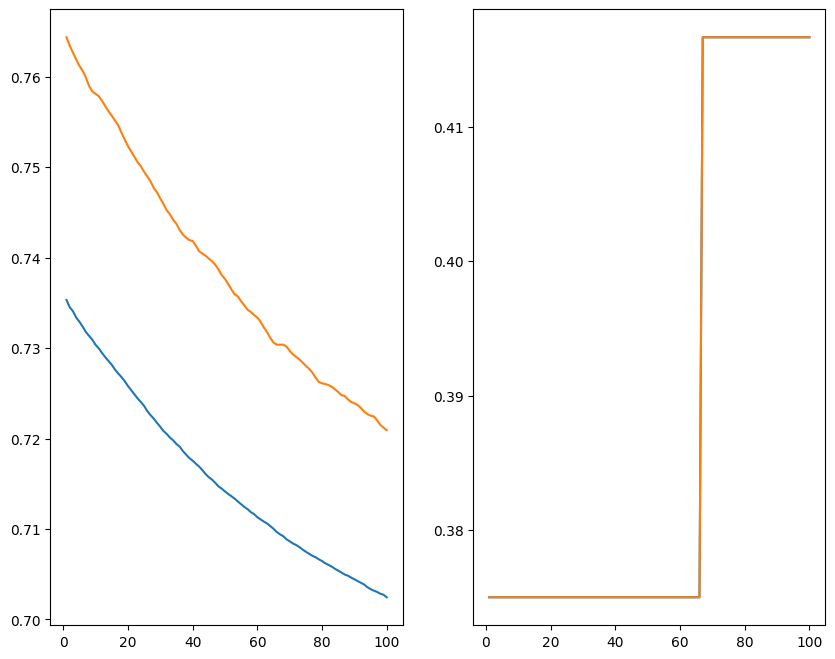

In [ ]:
%load_ext autoreload
# 외부에서 import한 모듈을 수정사항 발생 시 자동리로드
%autoreload 2 # %autoreload 2의 의미는 파이썬 코드를 실행하기 전에 항상 모든 모듈을 Reload하라는 의미이다

# very simple
model = models.Sequential([
    layers.Dense(1, input_shape=(2, ),activation = 'sigmoid'),
])

LR = 1e-3
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

EPOCH = 100
BATCH_SIZE = 30
history = model.fit(X_train, y_train, epochs = EPOCH, batch_size = BATCH_SIZE, validation_split = 0.1)
plot_history(history)

In [ ]:
# plain
model = models.Sequential([
    layers.Dense(100, input_shape=(2, ),activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

LR = 1e-3
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

EPOCH = 100
BATCH_SIZE = 30
history = model.fit(X_train, y_train, epochs = EPOCH, batch_size = BATCH_SIZE, validation_split = 0.1)

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.6614 - acc: 0.5324 - val_loss: 0.6635 - val_acc: 0.3750
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6163 - acc: 0.5231 - val_loss: 0.6435 - val_acc: 0.3750
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5861 - acc: 0.5231 - val_loss: 0.6255 - val_acc: 0.3750
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5528 - acc: 0.5324 - val_loss: 0.5950 - val_acc: 0.3750
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5169 - acc: 0.5833 - val_loss: 0.5590 - val_acc: 0.6250
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4796 - acc: 0.7222 - val_loss: 0.5164 - val_acc: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4380 - acc: 0.8796 - val_loss: 0.4710 - val_acc: 0.7917
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.3956 - acc: 0.9213 - va

In [ ]:
# deep 
model = models.Sequential([
    layers.Dense(100, input_shape=(2, ),activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(1, activation = 'sigmoid')
])

LR = 1e-3
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

EPOCH = 100
BATCH_SIZE = 30
history = model.fit(X_train, y_train, epochs = EPOCH, batch_size = BATCH_SIZE)

Epoch 1/100
8/8 [==============================] - 2s 4ms/step - loss: 0.6993 - acc: 0.5250
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7122 - acc: 0.5000
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6964 - acc: 0.4625
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6968 - acc: 0.5000
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6943 - acc: 0.4917
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6965 - acc: 0.4500
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6955 - acc: 0.5000
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6935 - acc: 0.5000
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6949 - acc: 0.5000
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6944 - acc: 0.4792
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6952 

Epoch 1/100
7/7 [==============================] - 3s 54ms/step - loss: 0.6986 - acc: 0.5312 - val_loss: 0.7172 - val_acc: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7079 - acc: 0.4792 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6944 - acc: 0.5000 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6950 - acc: 0.4792 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7034 - acc: 0.4375 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6947 - acc: 0.4896 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6943 - acc: 0.5000 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6986 - acc: 0.39

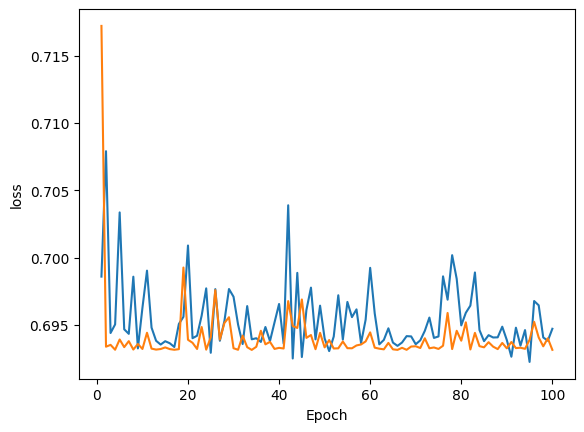

In [ ]:
# very deep with sigmoid 
model = models.Sequential([
    layers.Dense(100, input_shape=(2, ),activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(100,activation = 'sigmoid'),
    layers.Dense(1, activation = 'sigmoid')
])

LR = 1e-3
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

EPOCH = 100
BATCH_SIZE = 30
history = model.fit(X_train, y_train, epochs = EPOCH, 
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2)

plt.plot(range(1, len(history.history['loss'])+1), history.history['loss'])
plt.plot(range(1, len(history.history['loss'])+1), history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
# very deep with relu 

model = models.Sequential([
    layers.Dense(100, input_shape=(2, ),activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

LR = 1e-3

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LR),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['acc']
)

#early stopping 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

EPOCH = 100
BATCH_SIZE = 30
VAL_SPLIT = 0.2
history = model.fit(X_train, y_train, epochs = EPOCH, batch_size = BATCH_SIZE, 
                    validation_split = VAL_SPLIT,callbacks=[early])

Epoch 1/100
7/7 [==============================] - 4s 62ms/step - loss: 0.6824 - acc: 0.5573 - val_loss: 0.6479 - val_acc: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 19ms/step - loss: 0.5838 - acc: 0.5052 - val_loss: 0.4897 - val_acc: 0.5208
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.3966 - acc: 0.8021 - val_loss: 0.3242 - val_acc: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 0.3066 - acc: 0.9948 - val_loss: 0.2687 - val_acc: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2358 - acc: 1.0000 - val_loss: 0.1682 - val_acc: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1035 - acc: 1.0000 - val_loss: 0.0151 - val_acc: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 6.7804e-04 - val_acc: 1.0000
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 3.0323e-04 - a

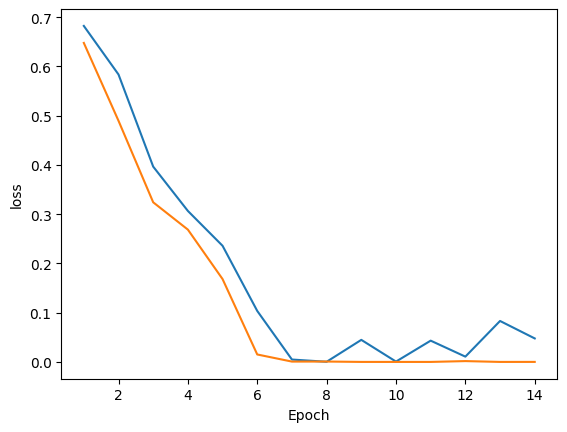

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(range(1, len(history.history['loss'])+1), history.history['loss'])
plt.plot(range(1, len(history.history['loss'])+1), history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test 

2/2 [==============================] - 0s 5ms/step


array([[1.78868991e-27],
       [2.17166491e-14],
       [2.03452165e-18],
       [9.22068204e-26],
       [3.89927650e-21],
       [2.83854472e-18],
       [9.99857962e-01],
       [3.35457679e-18],
       [9.99952197e-01],
       [1.35467612e-22],
       [9.99979198e-01],
       [9.99963999e-01],
       [6.61624601e-19],
       [9.99953806e-01],
       [9.99951124e-01],
       [9.99981761e-01],
       [9.99897897e-01],
       [1.14091158e-24],
       [9.99863207e-01],
       [9.99876618e-01],
       [1.03786226e-22],
       [1.64857652e-15],
       [9.99899685e-01],
       [9.60534225e-19],
       [6.60340083e-05],
       [7.23309473e-25],
       [3.93130342e-26],
       [9.99972403e-01],
       [4.11407248e-15],
       [9.99894977e-01],
       [4.79669563e-17],
       [9.99897480e-01],
       [9.98460293e-01],
       [2.08152937e-26],
       [2.46975606e-19],
       [3.84706669e-02],
       [0.00000000e+00],
       [9.99897242e-01],
       [9.99935508e-01],
       [9.99863386e-01],


In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m(y_test, y_pred_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

## 문제1 실습. 유방암 데이터 생성

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 유방암 data를 불러온 후, cancer 변수에 담아보자.
cancer = load_breast_cancer()

# 유방암 data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = 'accuracy'
)

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 2ms/step - loss: 2.9136 - accuracy: 0.7136
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.8945
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8970
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8945
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8518
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 0.8432 - accuracy: 0.8291
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8819
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.8317
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.8668
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 0.6407 - accuracy: 0.8693


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

6/6 - 0s - loss: 0.4875 - accuracy: 0.9123 - 104ms/epoch - 17ms/step

테스트 정확도: 0.9122806787490845


## 문제2 실습. 와인데이터

In [ ]:
from sklearn.datasets import load_wine

# wine data를 불러온 후, wine 변수에 담아보자.
wine = load_wine()

# wine data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [ ]:
X_train, y_train

(array([[1.475e+01, 1.730e+00, 2.390e+00, ..., 1.250e+00, 2.730e+00,
         1.150e+03],
        [1.340e+01, 3.910e+00, 2.480e+00, ..., 7.000e-01, 1.560e+00,
         7.500e+02],
        [1.247e+01, 1.520e+00, 2.200e+00, ..., 1.160e+00, 2.630e+00,
         9.370e+02],
        ...,
        [1.293e+01, 3.800e+00, 2.650e+00, ..., 1.030e+00, 3.520e+00,
         7.700e+02],
        [1.410e+01, 2.020e+00, 2.400e+00, ..., 1.070e+00, 2.750e+00,
         1.060e+03],
        [1.422e+01, 1.700e+00, 2.300e+00, ..., 9.400e-01, 3.310e+00,
         9.700e+02]]),
 array([0, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 1,
        1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2,
        2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 1,
        0, 0, 2, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1,
        1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0]))

In [ ]:
## y데이터를 OneHot 벡터로 변환하고 싶다면, 


# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = 'accuracy'
)

In [ ]:
model.fit(X_train, y_train, epochs = 50, validation_split = 0.1, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
4/4 [==============================] - 1s 50ms/step - loss: 96.4178 - accuracy: 0.2883 - val_loss: 18.9733 - val_accuracy: 0.6154
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 56.5562 - accuracy: 0.3423 - val_loss: 26.9041 - val_accuracy: 0.3077
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 50.8634 - accuracy: 0.4144 - val_loss: 16.2123 - val_accuracy: 0.3077
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 23.2662 - accuracy: 0.4234 - val_loss: 5.9062 - val_accuracy: 0.6154
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 12.9320 - accuracy: 0.2883 - val_loss: 7.1490 - val_accuracy: 0.0000e+00
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 11.0307 - accuracy: 0.2973 - val_loss: 14.9425 - val_accuracy: 0.0769
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 5.8556 - accuracy: 0.3604 - val_loss: 2.0941 - val_accuracy: 0.5385
Epoch 8/50
4/

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

2/2 - 0s - loss: 2.0027 - accuracy: 0.3333 - 19ms/epoch - 9ms/step

테스트 정확도: 0.3333333432674408


## 문제3 실습 - 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_data)

In [ ]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape = (8, ), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)  # 회귀 모델의 마지막 output layer는 activation을 None 혹은 'linear'로 넣습니다!
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = 'mse',
    metrics=['mae', 'mse']
)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_split = 0.1)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 1.2950 - mae: 0.7151 - mse: 1.2950 - val_loss: 0.5089 - val_mae: 0.5078 - val_mse: 0.5089
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.4368 - mae: 0.4672 - mse: 0.4368 - val_loss: 0.4316 - val_mae: 0.4542 - val_mse: 0.4316
Epoch 3/30
465/465 [==============================] - 1s 2ms/step - loss: 0.3833 - mae: 0.4392 - mse: 0.3833 - val_loss: 0.4039 - val_mae: 0.4584 - val_mse: 0.4039
Epoch 4/30
465/465 [==============================] - 1s 2ms/step - loss: 0.3659 - mae: 0.4266 - mse: 0.3659 - val_loss: 0.3951 - val_mae: 0.4435 - val_mse: 0.3951
Epoch 5/30
465/465 [==============================] - 1s 1ms/step - loss: 0.3456 - mae: 0.4158 - mse: 0.3456 - val_loss: 0.3818 - val_mae: 0.4312 - val_mse: 0.3818
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: 0.3468 - mae: 0.4096 - mse: 0.3468 - val_loss: 0.3640 - val_mae: 0.4179 - val_mse: 0.3640
Epoch 7/30
465/4

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

129/129 - 0s - loss: 0.2773 - mae: 0.3611 - mse: 0.2773 - 116ms/epoch - 901us/step


[0.27730342745780945, 0.36114978790283203, 0.27730342745780945]

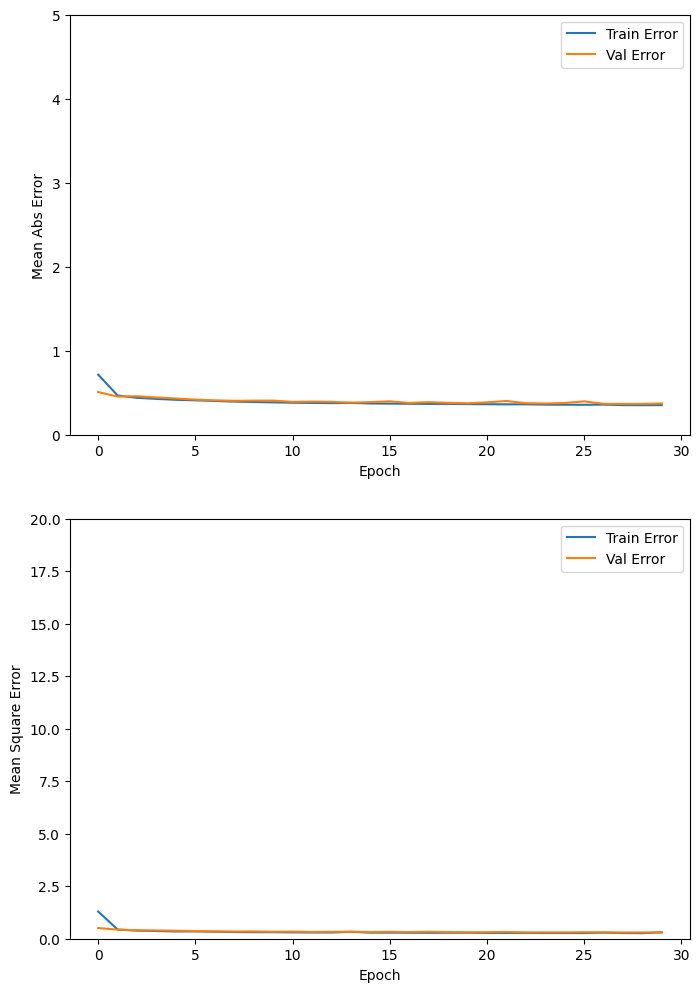

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f}".format(mae))

129/129 - 0s - loss: 0.2773 - mae: 0.3611 - mse: 0.2773 - 415ms/epoch - 3ms/step
테스트 세트의 평균 절대 오차:  0.36


129/129 [==============================] - 0s 2ms/step


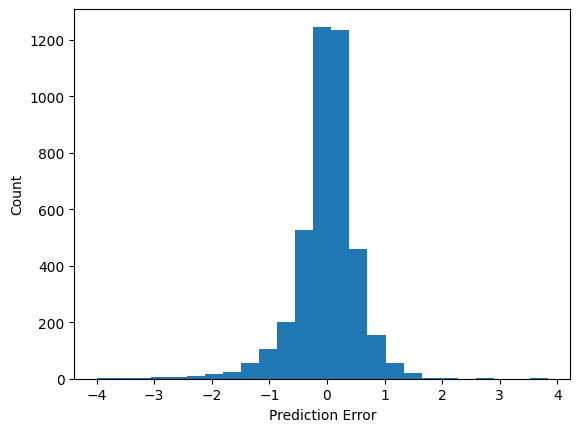

In [ ]:
#  오차의 분포
test_predictions = model.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")